In [1]:
%matplotlib widget

import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util import get_dates_datetime, get_dirname, get_data_info, update_plate_info, \
get_current_folders, get_folders_by_plate_id


import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
from amftrack.pipeline.functions.node_id import orient
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.experiment_class_surf import Experiment
from amftrack.pipeline.paths.directory import run_parallel, find_state, directory_scratch, directory_project, run_parallel_stitch

In [2]:
directory = directory_project
update_plate_info(directory)

In [3]:
directory = directory_scratch+'data/'
update_plate_info(directory)

In [22]:
directory_project,directory

('/projects/0/einf914/data/', '/scratch-shared/amftrack/data/')

In [4]:
all_folders = get_current_folders(directory)
len(all_folders)

1863

In [5]:
folders = all_folders
folders.columns
folders['/Analysis/skeleton_compressed.mat']

2692    True
2693    True
2694    True
2695    True
2696    True
2697    True
2698    True
2699    True
2700    True
2701    True
2702    True
2703    True
2704    True
2705    True
2706    True
2707    True
Name: /Analysis/skeleton_compressed.mat, dtype: object

In [6]:
folders = all_folders.loc[all_folders['Plate']==59]

In [15]:
all_folders.loc[all_folders['strain']=='A5']

folder Plate PrincePos    root strain    medium split  \
8     20201205_1320_Plate38    59        38  Carrot     A5  001P100N     Y   
12    20201206_1327_Plate40    69        40  Carrot     A5  001P100N     Y   
14    20210110_1144_Plate38    76        38  Carrot     A5  001P100N     Y   
21    20210112_1120_Plate29    22        29  Carrot     A5  001P100N     Y   
24    20201226_0742_Plate37    91        37  Carrot     A5  001P100N     Y   
...                     ...   ...       ...     ...    ...       ...   ...   
2687  20211003_1129_Plate31   800        31  Carrot     A5  001P100N     Y   
2688  20210916_2307_Plate17    88        17  Carrot     A5  001P100N     Y   
2689  20210924_1723_Plate22   787        22  Carrot     A5  001P100N     Y   
2690  20211008_0616_Plate38   785        38  Carrot     A5  001P100N     Y   
2691  20210917_0118_Plate21   792        21  Carrot     A5  001P100N     Y   

     Temp CrossDate /Img/TileConfiguration.txt.registered  ...  \
8     NaN  20201126                                  True  ...   
12     25  20201119                                  True  ...   
14    NaN  20210108                                  True  ...   
21    NaN  20210107                                  True  ...   
24    NaN  20201217                                  True  ...   
...   ...       ...                                   ...  ...   
2687  NaN  20210928                                  True  ...   
2688  NaN  20210915                                  True  ...   
2689  NaN  20210922                                  True  ...   
2690  NaN  20210928                                  True  ...   
2691  NaN  20210915                                  True  ...   

     /Analysis/skeleton_masked_compressed.mat  \
8                                        True   
12                                       True   
14                                       True   
21                                       True   
24                                       True   
...                                       ...   
2687                                     True   
2688                                     True   
2689                                     True   
2690                                     True   
2691                                     True   

     /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
8                                        True                   False   
12                                       True                   False   
14                                       True                    True   
21                                       True                    True   
24                                       True                   False   
...                                       ...                     ...   
2687                                     True                   False   
2688                                     True                   False   
2689                                     True                   False   
2690                                     True                   False   
2691                                     True                   False   

     /Analysis/transform_corrupt.mat  \
8                              False   
12                             False   
14                             False   
21                             False   
24                             False   
...                              ...   
2687                           False   
2688                           False   
2689                           False   
2690                           False   
2691                           False   

     /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
8                                          False                       False   
12                                         False                       False   
14                                          True                        True   
21                      

In [4]:
folders = all_folders.loc[(all_folders['strain']=='A5')&(all_folders['/Analysis/skeleton_pruned_compressed.mat'])]
len(folders)

1748

In [5]:
folders = all_folders.loc[(all_folders['strain']=='A5')&(all_folders['/Analysis/skeleton_realigned_compressed.mat'])]
len(folders)

1748

In [16]:
folders.columns

Index(['folder', 'Plate', 'PrincePos', 'root', 'strain', 'medium', 'split',
       'Temp', 'CrossDate', '/Img/TileConfiguration.txt.registered',
       '/Analysis/skeleton_compressed.mat',
       '/Analysis/skeleton_masked_compressed.mat',
       '/Analysis/skeleton_pruned_compressed.mat', '/Analysis/transform.mat',
       '/Analysis/transform_corrupt.mat',
       '/Analysis/skeleton_realigned_compressed.mat',
       '/Analysis/nx_graph_pruned.p', '/Analysis/nx_graph_pruned_width.p',
       '/Analysis/nx_graph_pruned_labeled.p', 'date', 'Pbait'],
      dtype='object')

In [12]:
folders = all_folders.loc[(all_folders['strain']=='A5')&(1-all_folders['/Analysis/transform.mat'])&(all_folders['/Analysis/skeleton_pruned_compressed.mat'])]
len(folders)

26

In [4]:
folders = all_folders.loc[all_folders['/Analysis/transform_corrupt.mat']]

In [5]:
folders

folder Plate PrincePos    root strain    medium split  \
120   20201217_1350_Plate38    59        38  Carrot     A5  001P100N     Y   
947   20201210_1156_Plate39    94        39  Carrot     A5  001P100N     Y   
1047  20201209_0926_Plate40    69        40  Carrot     A5  001P100N     Y   
1434  20201207_0523_Plate39    94        39  Carrot     A5  001P100N     Y   
1847  20210927_2112_Plate22   787        22  Carrot     A5  001P100N     Y   
1881  20211002_1543_Plate38   785        38  Carrot     A5  001P100N     Y   
2078  20210929_0912_Plate21   792        21  Carrot     A5  001P100N     Y   
2226  20211005_0345_Plate38   785        38  Carrot     A5  001P100N     Y   

     Temp CrossDate /Img/TileConfiguration.txt.registered  ...  \
120   NaN  20201126                                  True  ...   
947    25  20201123                                  True  ...   
1047  NaN  20201119                                  True  ...   
1434   25  20201123                                  True  ...   
1847  NaN  20210922                                  True  ...   
1881  NaN  20210928                                  True  ...   
2078  NaN  20210915                                  True  ...   
2226  NaN  20210928                                  True  ...   

     /Analysis/skeleton_masked_compressed.mat  \
120                                      True   
947                                      True   
1047                                     True   
1434                                     True   
1847                                     True   
1881                                     True   
2078                                     True   
2226                                     True   

     /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
120                                      True                   False   
947                                      True                   False   
1047                                     True                   False   
1434                                     True                   False   
1847                                     True                   False   
1881                                     True                   False   
2078                                     True                   False   
2226                                     True                   False   

     /Analysis/transform_corrupt.mat  \
120                             True   
947                             True   
1047                            True   
1434                            True   
1847                            True   
1881                            True   
2078                            True   
2226                            True   

     /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
120                                        False                       False   
947                                        False                       False   
1047                                       False                       False   
1434                                       False                       False   
1847                                       False                       False   
1881                                       False                       False   
2078                                       False                       False   
2226                                       False                       False   

     /Analysis/nx_graph_pruned_width.p /Analysis/nx_graph_pruned_labeled.p  \
120                              False                               False   
947                              False                               False   
1047                             False                               False   
1434                             False                               False   
1847                             False                               False   
1881                             False                               Fals

In [1]:
dates = list(all_folders.loc[all_folders['Plate']==785]['folder'])
dates.sort()
dates

NameError: name 'all_folders' is not defined

In [17]:
folders = all_folders.loc[all_folders['Plate']==plate*all_folders['/Analysis/skeleton_pruned_compressed.mat']]
len(folders)

21

In [18]:
folders = all_folders.loc[all_folders['Plate']==plate*all_folders['/Analysis/skeleton_realigned_compressed.mat']]
len(folders)

20

In [19]:
folders = all_folders.loc[all_folders['Plate']==plate*(all_folders['/Analysis/transform.mat'])]
# list_fold = list(folders['folder'])
# list_fold.sort()
# list_fold
len(folders)

20

In [7]:
folder_list = list(all_folders['folder'])
folder_list.sort()
folder_list

['20210907_1108_Plate23',
 '20210907_1308_Plate23',
 '20210907_1503_Plate22',
 '20210907_1507_Plate23',
 '20210907_1703_Plate22',
 '20210907_1707_Plate23',
 '20210907_1903_Plate22',
 '20210907_1907_Plate23',
 '20210907_2103_Plate22',
 '20210907_2107_Plate23',
 '20210907_2303_Plate22',
 '20210907_2307_Plate23',
 '20210908_0103_Plate22',
 '20210908_0107_Plate23',
 '20210908_0303_Plate22',
 '20210908_0307_Plate23',
 '20210908_0503_Plate22',
 '20210908_0507_Plate23',
 '20210908_0703_Plate22',
 '20210908_0707_Plate23',
 '20210908_1008_Plate22',
 '20210908_1012_Plate23',
 '20210908_1208_Plate22',
 '20210908_1212_Plate23',
 '20210909_1814_Plate22',
 '20210909_1818_Plate23',
 '20210909_2013_Plate22',
 '20210909_2017_Plate23',
 '20210909_2213_Plate22',
 '20210909_2217_Plate23',
 '20210910_0013_Plate22',
 '20210910_0017_Plate23',
 '20210910_0213_Plate22',
 '20210910_0217_Plate23',
 '20210910_0413_Plate22',
 '20210910_0417_Plate23',
 '20210910_0613_Plate22',
 '20210910_0617_Plate23',
 '20210910_0

In [11]:
plate_num = 7992
folders = all_folders.loc[all_folders['Plate']==plate_num]
folders.head()

folder Plate PrincePos    root strain    medium split  \
2399  20211013_1159_Plate30  7992        30  Carrot     A5  001P100N     Y   

     Pbait CrossDate                date  \
2399     -  20211001  13.10.2021, 11:59:   

     /Img/TileConfiguration.txt.registered /Analysis/skeleton_compressed.mat  \
2399                                 False                             False   

     /Analysis/skeleton_masked_compressed.mat  \
2399                                    False   

     /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
2399                                    False                   False   

     /Analysis/transform_corrupt.mat  \
2399                           False   

     /Analysis/skeleton_realigned_compressed.mat  
2399                                       False

In [50]:
folders = all_folders.loc[(all_folders['Plate']==plate_num)*(all_folders['/Analysis/skeleton_pruned_compressed.mat']==True)]
folders.head()

/home/cbisot/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


folder Plate PrincePos    root strain    medium split  \
1158  20210910_0017_Plate23   790        23  Carrot     A5  001P100N     Y   
1159  20210912_1617_Plate23   790        23  Carrot     A5  001P100N     Y   
1164  20210912_1817_Plate23   790        23  Carrot     A5  001P100N     Y   
1166  20210913_1217_Plate23   790        23  Carrot     A5  001P100N     Y   
1168  20210911_0617_Plate23   790        23  Carrot     A5  001P100N     Y   

     Pbait CrossDate                date  \
1158     -  20210907  10.09.2021, 00:17:   
1159     -  20210907  12.09.2021, 16:17:   
1164     -  20210907  12.09.2021, 18:17:   
1166     -  20210907  13.09.2021, 12:17:   
1168     -  20210907  11.09.2021, 06:17:   

     /Img/TileConfiguration.txt.registered /Analysis/skeleton_compressed.mat  \
1158                                  True                              True   
1159                                  True                              True   
1164                                  True                              True   
1166                                  True                              True   
1168                                  True                              True   

     /Analysis/skeleton_masked_compressed.mat  \
1158                                     True   
1159                                     True   
1164                                     True   
1166                                     True   
1168                                     True   

     /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
1158                                     True                    True   
1159                                     True                    True   
1164                                     True                    True   
1166                                     True                    True   
1168                                     True                    True   

     /Analysis/transform_corrupt.mat  \
1158                           False   
1159                           False   
1164                           False   
1166                           False   
1168                           False   

     /Analysis/skeleton_realigned_compressed.mat  
1158                                       False  
1159                                       False  
1164                                       False  
1166                                       False  
1168                                       False

In [36]:
folder_list = list(folders['folder'])
folder_list.sort()
folder_list

['20210907_1108_Plate23',
 '20210907_1308_Plate23',
 '20210907_1507_Plate23',
 '20210907_1707_Plate23',
 '20210907_1907_Plate23',
 '20210907_2107_Plate23',
 '20210907_2307_Plate23',
 '20210908_0107_Plate23',
 '20210908_0307_Plate23',
 '20210908_0507_Plate23',
 '20210908_0707_Plate23',
 '20210908_1012_Plate23',
 '20210908_1212_Plate23',
 '20210909_1818_Plate23',
 '20210909_2017_Plate23',
 '20210909_2217_Plate23',
 '20210910_0017_Plate23',
 '20210910_0217_Plate23',
 '20210910_0417_Plate23',
 '20210910_0617_Plate23',
 '20210910_0817_Plate23',
 '20210910_1017_Plate23',
 '20210910_1217_Plate23',
 '20210910_1417_Plate23',
 '20210910_1617_Plate23',
 '20210910_1817_Plate23',
 '20210910_2017_Plate23',
 '20210910_2217_Plate23',
 '20210911_0017_Plate23',
 '20210911_0217_Plate23',
 '20210911_0417_Plate23',
 '20210911_0617_Plate23',
 '20210911_0817_Plate23',
 '20210911_1017_Plate23',
 '20210911_1217_Plate23',
 '20210911_1417_Plate23',
 '20210911_1617_Plate23',
 '20210911_1817_Plate23',
 '20210911_2

In [9]:
folders = all_folders.loc[all_folders['folder'].isin(['20211015_0551_Plate37','20211015_0558_Plate39','20211015_0536_Plate33'])]

***Chose plate number and directory of interest where the folders with images are***

In [84]:
plate_id = 72120210818
folders =get_folders_by_plate_id(plate_id,0,-1,directory_scratch)

In [11]:
folders.head()

folder Plate PrincePos    root strain    medium split  \
2402  20211015_0551_Plate37   809        37  Carrot     A5  001P100N     Y   
2403  20211015_0536_Plate33   803        33  Carrot     A5  001P100N     Y   
2404  20211015_0558_Plate39   799        39  Carrot     A5  001P100N     Y   

     Pbait CrossDate                date  \
2402     -  20211012  15.10.2021, 05:51:   
2403     -  20211012  15.10.2021, 05:36:   
2404     -  20211001  15.10.2021, 05:58:   

     /Img/TileConfiguration.txt.registered /Analysis/skeleton_compressed.mat  \
2402                                 False                             False   
2403                                 False                             False   
2404                                 False                             False   

     /Analysis/skeleton_masked_compressed.mat  \
2402                                    False   
2403                                    False   
2404                                    False   

     /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
2402                                    False                   False   
2403                                    False                   False   
2404                                    False                   False   

     /Analysis/transform_corrupt.mat  \
2402                           False   
2403                           False   
2404                           False   

     /Analysis/skeleton_realigned_compressed.mat  
2402                                       False  
2403                                       False  
2404                                       False

***Chose timestep to begin with and folder to end with***

***Stitching***

In [46]:
num_parallel = 25
time = '20:00'
run_parallel_stitch(directory,folders,num_parallel,time)

Submitted batch job 42080


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


***Skeletonization***
- Only 4 skeletonization processes can be run in parallel on one node

In [11]:
num_parallel = 25
time = '3:00:00'
low = 30
high = 80
extend = 30
args=[low, high, extend,directory]
run_parallel('extract_skel.py',args,folders,num_parallel, time,'skeletonization',cpus=128)

sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 44140


***Compress raw image***

In [12]:
num_parallel = 25
time = '2:00'
args = [directory]
run_parallel('compress_image.py',args, folders, num_parallel, time, 'compress',cpus=128)

Submitted batch job 44141


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


***Check Skeletonization***
- The first cell loads the skeleton and the compressed raw image
- The second cell shows the overlap of the skeleton and the raw image

In [10]:
# select = all_folders.loc[(all_folders['folder'].isin([ '20210929_0308_Plate21',
#  '20210929_0912_Plate21']))]
select = folders
folder_list = list(select['folder'])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 1
start = 98

# start = choice(range(len(folder_list)))
finish = start+2
for folder in folder_list[start:finish]:
    path_snap=directory+folder
    skel_info = read_mat(path_snap+'/Analysis/skeleton_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
#     im = imageio.imread(path_snap+'/StitchedImage.tif')
#     im = cv2.resize(im,(skel.shape[1],skel.shape[0]))
#     M = np.float32([
# 	[1, 0, 0],
# 	[0, 1, -117]])
#     im = cv2.warpAffine(im,M,(im.shape[1], im.shape[0]))
    ims.append(im)

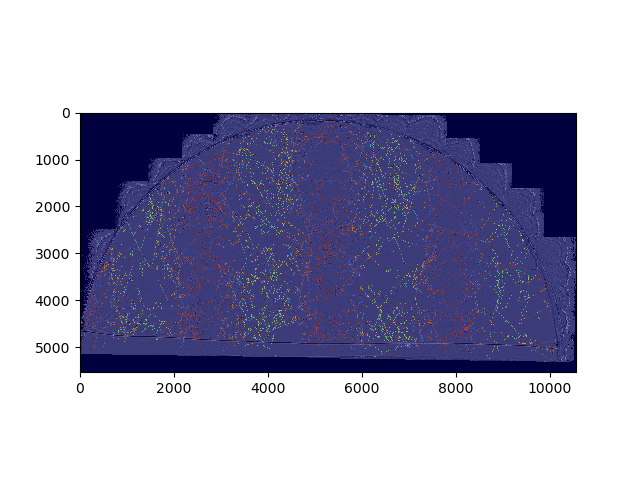

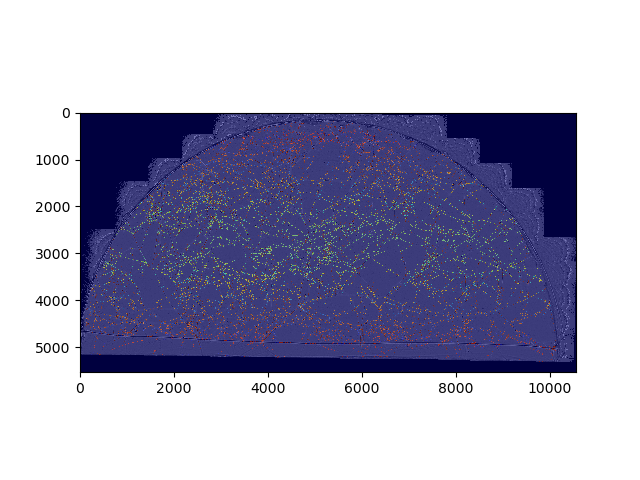

In [11]:
plt.close('all')
start = 0
finish = start + 2
for i in range(start,finish):
    plot_t_tp1([], [], None, None, skels[i], ims[i])

- Chose start and finish to display the overlap of the skeleton and the raw image : no more than 10 at a time or jupyter will crash.
- For display purpose, everything is compressed so connectivity may be lost
- colors are just a feature of compression

***Check specific image***
- If something wrong is noticed in one of the skeletons one can chose to look closer at one of the images and the skeletonization process
- chose ***i*** equal to the timestep where something wrong has been noticed 

In [3]:
#chose i equal to the timestep where something wrong has been noticed 
directory = "/projects/0/einf914/to_save/"
i = 0 + 55
plate = 38
dates_datetime = get_dates_datetime(directory,plate)
dates = dates_datetime

date =dates [i]
directory_name = get_dirname(date,plate)
print(directory_name)
path_snap=directory+directory_name
path_tile=path_snap+'/Img/TileConfiguration.txt.registered'
try:
    tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
except:
    print('error_name')
    path_tile=path_snap+'/Img/TileConfiguration.registered.txt'
    tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
xs =[c[0] for c in tileconfig[2]]
ys =[c[1] for c in tileconfig[2]]
dim = (int(np.max(ys)-np.min(ys))+4096,int(np.max(xs)-np.min(xs))+4096)
ims = []
for name in tileconfig[0]:
    imname = '/Img/'+name.split('/')[-1]
    ims.append(imageio.imread(directory+directory_name+imname))


20210823_0926_Plate38


- Chose a x,y position where you want to see how the skeletonization process went (x is the scale on the left on the images and y is the bottom scale)
- You can chose to display different part of the filter par commenting/uncommenting

108
Raw image
Raw image with background removed
frangised image
final transformed image
threhsolded image
threhsolded image
extended tips
final_skel


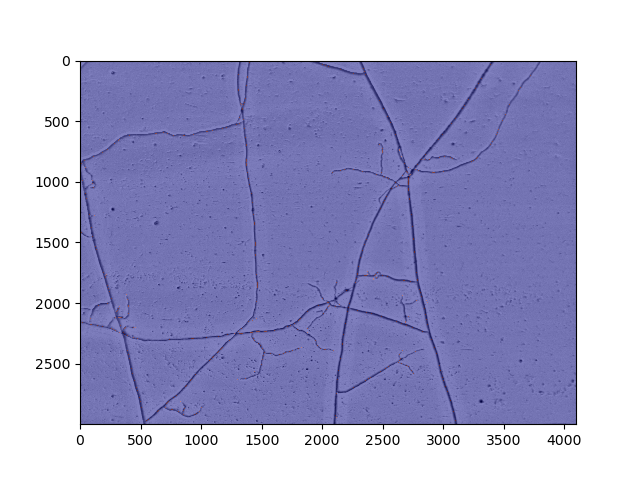

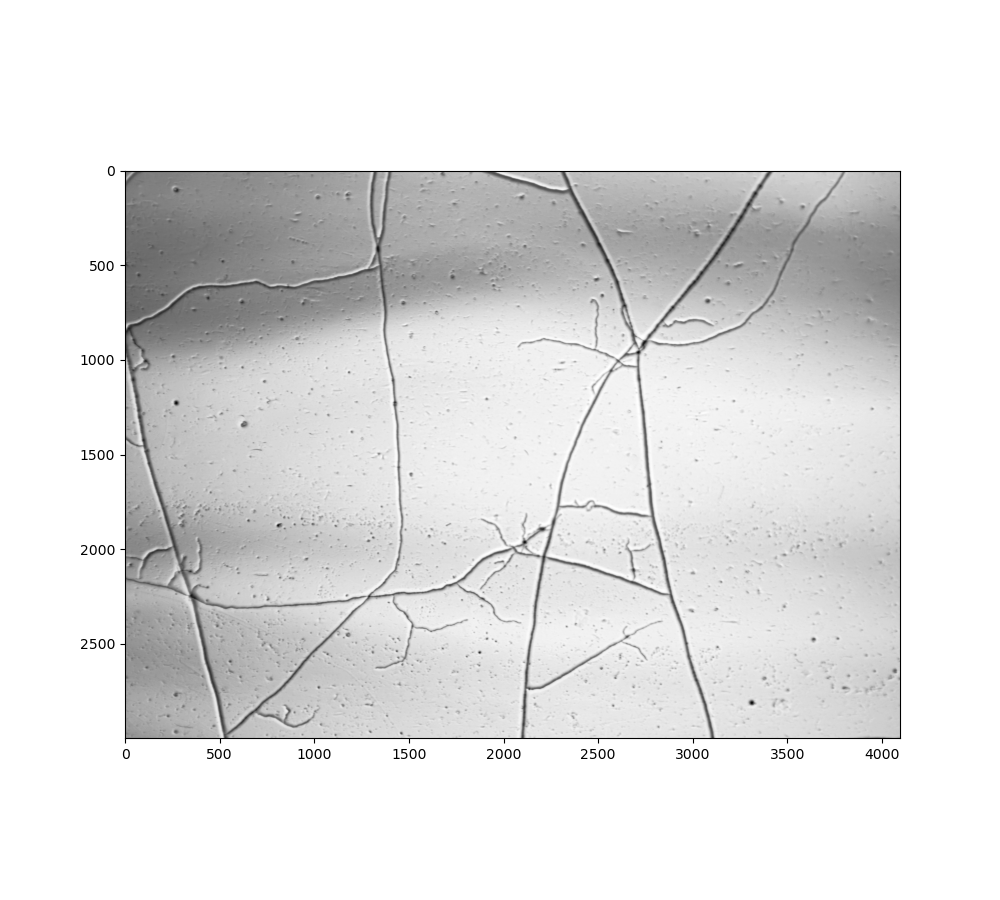

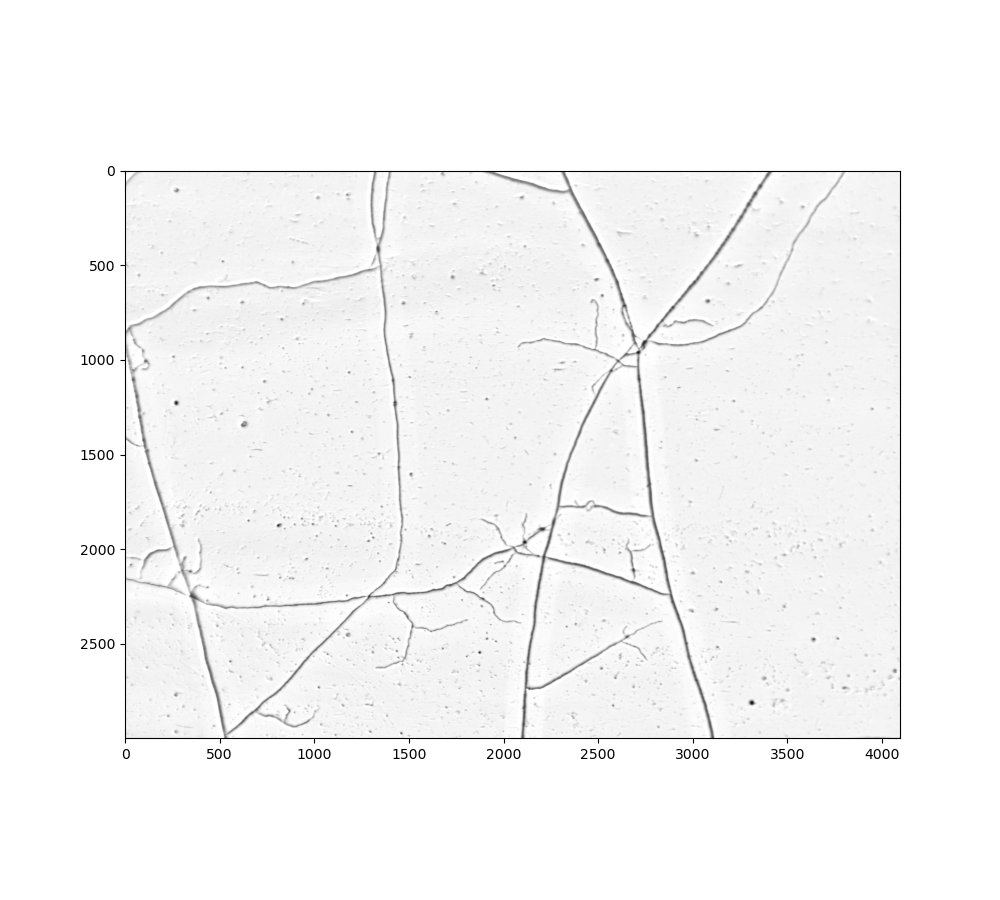

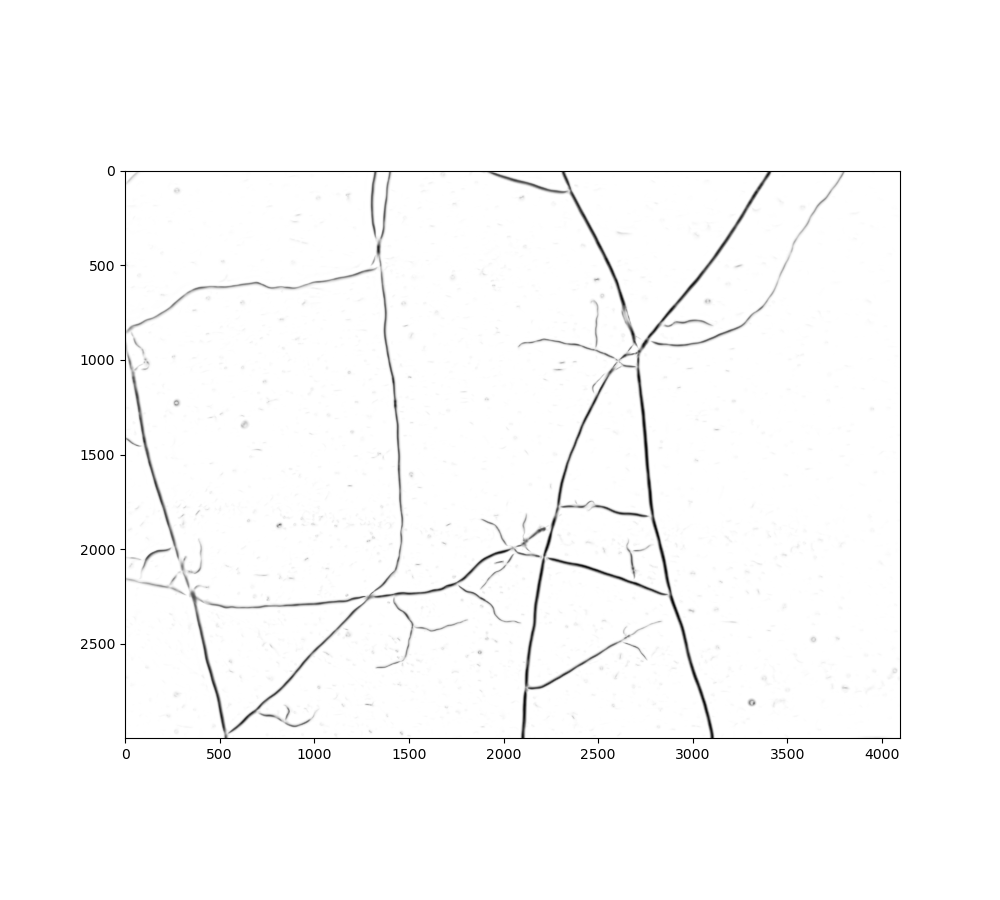

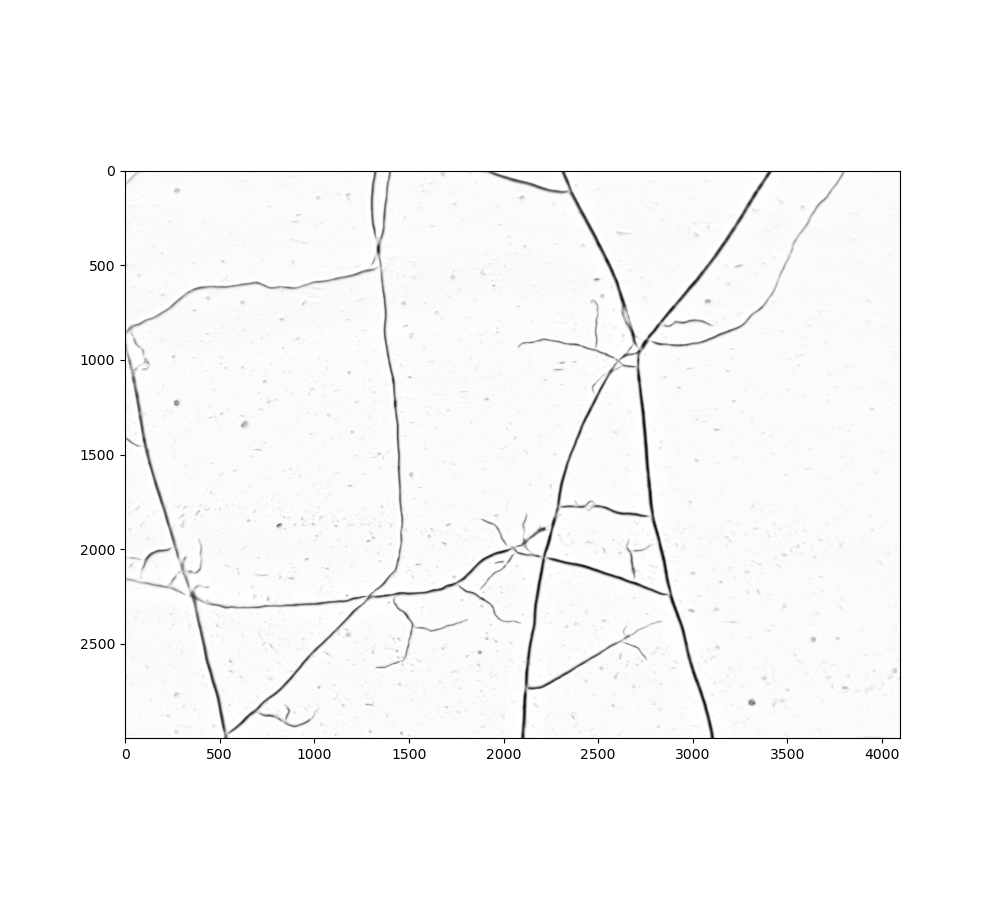

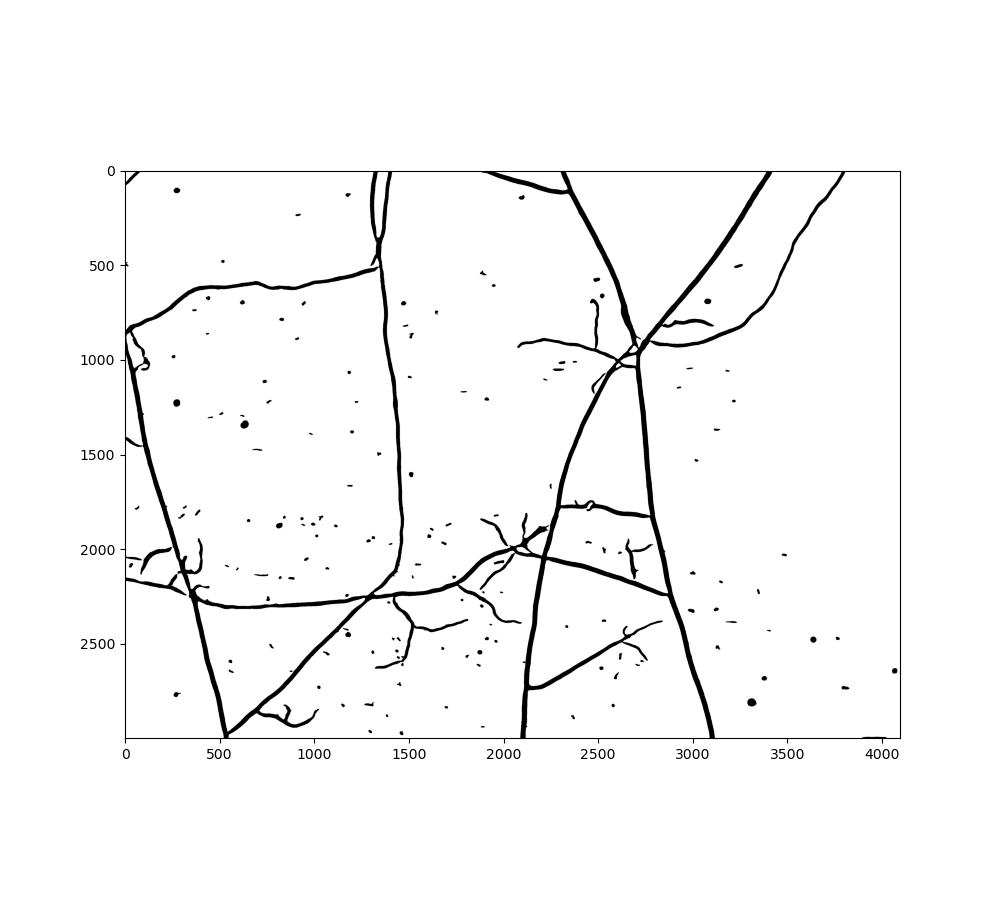

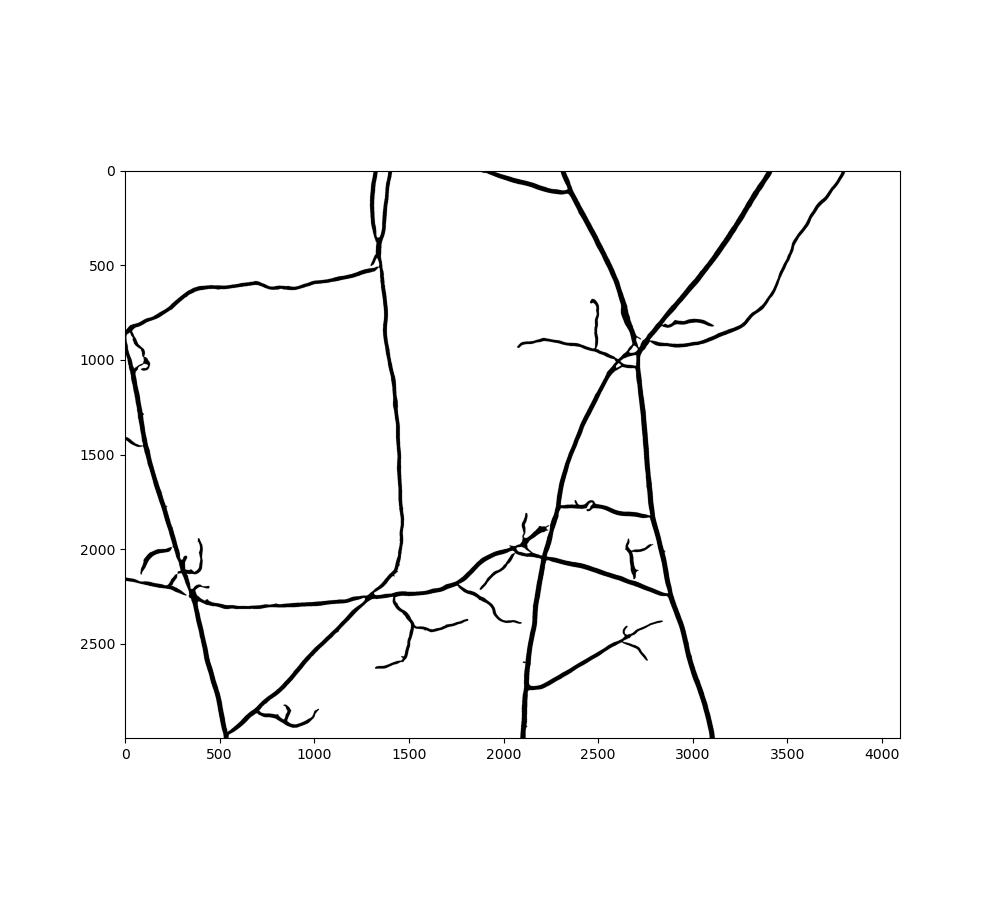

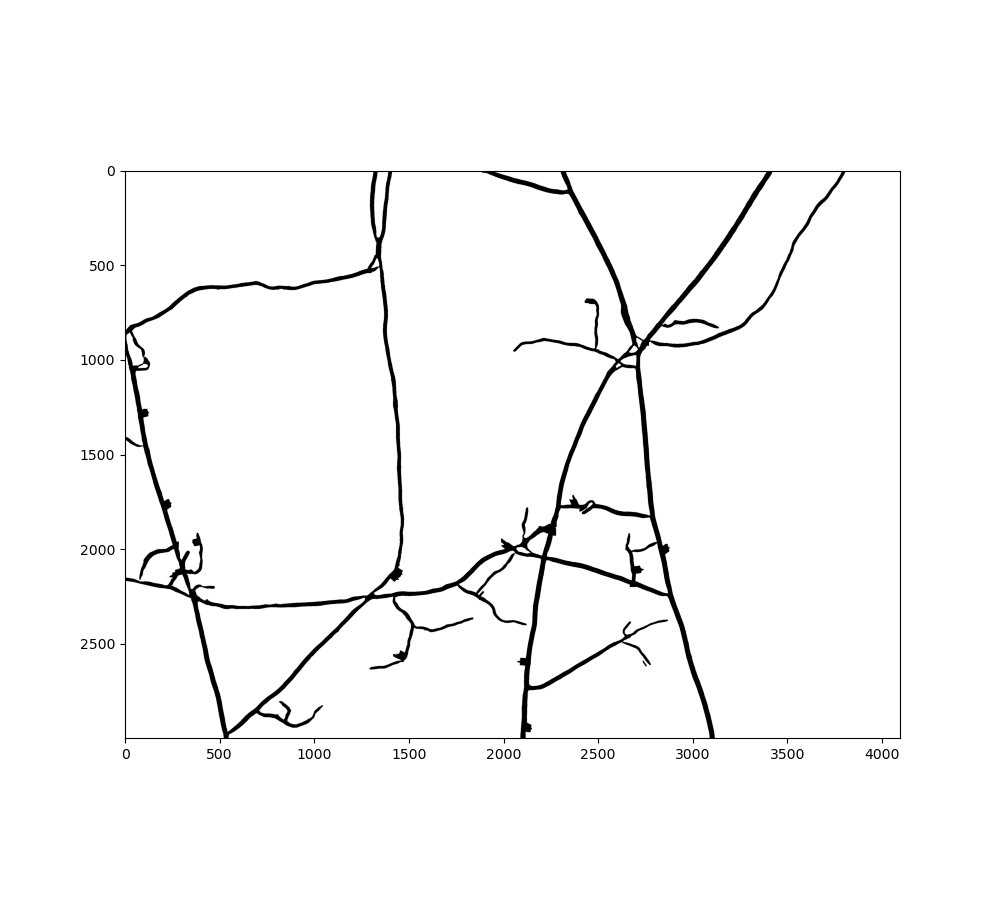

In [4]:
plt.close('all')

#chose a spot where to look closer at
linex  = 22412//5
liney = 36308//5
low = 40
high = 80
extend = 30
dist = extend
shape = (3000,4096)
linex *= 5
liney *= 5
for index,im in enumerate(ims):
    boundaries = int(tileconfig[2][index][0]-np.min(xs)),int(tileconfig[2][index][1]-np.min(ys))
    if boundaries[1]<=linex< boundaries[1]+shape[0] and boundaries[0]<=liney< boundaries[0]+shape[1]:
        print(index)
        im_cropped = im
#         im_blurred =cv2.GaussianBlur(im_cropped, (201, 201),50)
        im_blurred =cv2.blur(im_cropped, (200, 200))
        im_back_rem = (im_cropped)/((im_blurred==0)*np.ones(im_blurred.shape)+im_blurred)*120
        im_back_rem[im_back_rem>=130]=130
        # im_back_rem = im_cropped*1.0
        # # im_back_rem = cv2.normalize(im_back_rem, None, 0, 255, cv2.NORM_MINMAX)
        frangised = frangi(im_back_rem,sigmas=range(1,20,4))*255
        # # frangised = cv2.normalize(frangised, None, 0, 255, cv2.NORM_MINMAX)
        hessian = hessian_matrix_det(im_back_rem,sigma = 20)
        blur_hessian = cv2.blur(abs(hessian), (20, 20))
    #     transformed = (frangised+cv2.normalize(blur_hessian, None, 0, 255, cv2.NORM_MINMAX)-im_back_rem+120)*(im_blurred>=35)
    #     transformed = (frangised+cv2.normalize(abs(hessian), None, 0, 255, cv2.NORM_MINMAX)-im_back_rem+120)*(im_blurred>=35)
        transformed = (frangised-im_back_rem+120)*(im_blurred>=35)

        lowt = (transformed > low).astype(int)
        hight = (transformed > high).astype(int)
        hyst = filters.apply_hysteresis_threshold(transformed, low, high)
        kernel = np.ones((3,3),np.uint8)
        dilation = cv2.dilate(hyst.astype(np.uint8) * 255,kernel,iterations = 1)
        for i in range(3):
            dilation=cv2.erode(dilation.astype(np.uint8) * 255,kernel,iterations = 1)
            dilation = cv2.dilate(dilation.astype(np.uint8) * 255,kernel,iterations = 1)
        dilated = dilation>0

        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(dilated.astype(np.uint8), connectivity=8)
        #connectedComponentswithStats yields every seperated component with information on each of them, such as size
        #the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
        sizes = stats[1:, -1]; nb_components = nb_components - 1

        # minimum size of particles we want to keep (number of pixels)
        #here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
        min_size = 4000  

        #your answer image
        img2 = np.zeros((dilated.shape))
        #for every component in the image, you keep it only if it's above min_size
        for i in range(0, nb_components):
            if sizes[i] >= min_size:
                img2[output == i + 1] = 1
        skeletonized = cv2.ximgproc.thinning(np.array(255*img2,dtype=np.uint8))
        nx_g = generate_nx_graph(from_sparse_to_graph(scipy.sparse.dok_matrix(skeletonized)))
        g,pos= nx_g
        tips = [node for node in g.nodes if g.degree(node)==1]
        dilated_bis = np.copy(img2)
        for tip in tips:
            branch = np.array(orient(g.get_edge_data(*list(g.edges(tip))[0])['pixel_list'],pos[tip]))
            orientation = branch[0]-branch[min(branch.shape[0]-1,20)]
            orientation = orientation/(np.linalg.norm(orientation))
            window = 20
            x,y = pos[tip][0],pos[tip][1]
            if x-window>=0 and x+window< dilated.shape[0] and y-window>=0 and y+window< dilated.shape[1]:
                shape_tip = dilated[x-window:x+window,y-window:y+window]
    #             dist = 20
                for i in range(dist):
                    pixel = (pos[tip]+orientation*i).astype(int)
                    xp,yp = pixel[0],pixel[1]
                    if xp-window>=0 and xp+window< dilated.shape[0] and yp-window>=0 and yp+window< dilated.shape[1]:
                        dilated_bis[xp-window:xp+window,yp-window:yp+window]+=shape_tip
        dilation = cv2.dilate(dilated_bis.astype(np.uint8) * 255,kernel,iterations = 1)
        for i in range(3):
            dilation=cv2.erode(dilation.astype(np.uint8) * 255,kernel,iterations = 1)
            dilation = cv2.dilate(dilation.astype(np.uint8) * 255,kernel,iterations = 1)
        skeletonized = cv2.ximgproc.thinning(np.array(255*(dilation>0),dtype=np.uint8))
        print('Raw image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(-im,cmap = 'Greys')
        print('Raw image with background removed')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(-im_back_rem,cmap = 'Greys')
        print('frangised image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(frangised,cmap = 'Greys')
        print('final transformed image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(transformed,cmap = 'Greys')
        print('threhsolded image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(dilated>0,cmap = 'Greys')
        print('threhsolded image')
        fig=plt.figure(figsize=(10,9))
        
        ax = fig.add_subplot(111)
        ax.imshow(img2>0,cmap = 'Greys')
        print('extended tips')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(dilated_bis>0,cmap = 'Greys')
        print('final_skel')
#         fig=plt.figure(figsize=(10,9))
#         ax = fig.add_subplot(111)
#         ax.imshow(cv2.normalize(abs(hessian), None, 0, 255, cv2.NORM_MINMAX)-255*dilated)
        plot_t_tp1([],[],None,None,skeletonized,im_back_rem)

108
Raw image
Raw image with background removed
bowled image
final transformed image
threhsolded image
threhsolded image


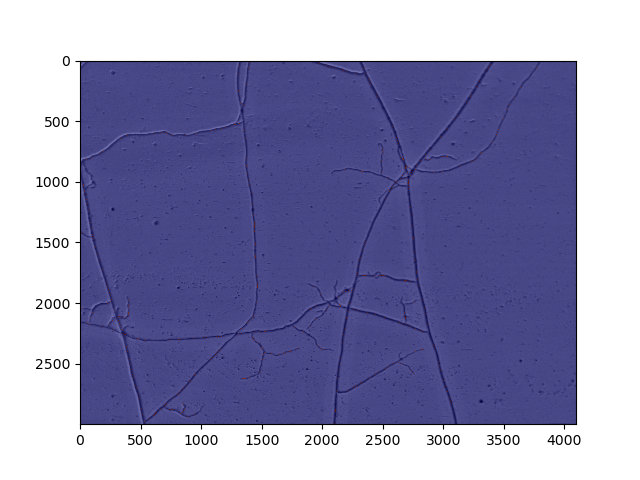

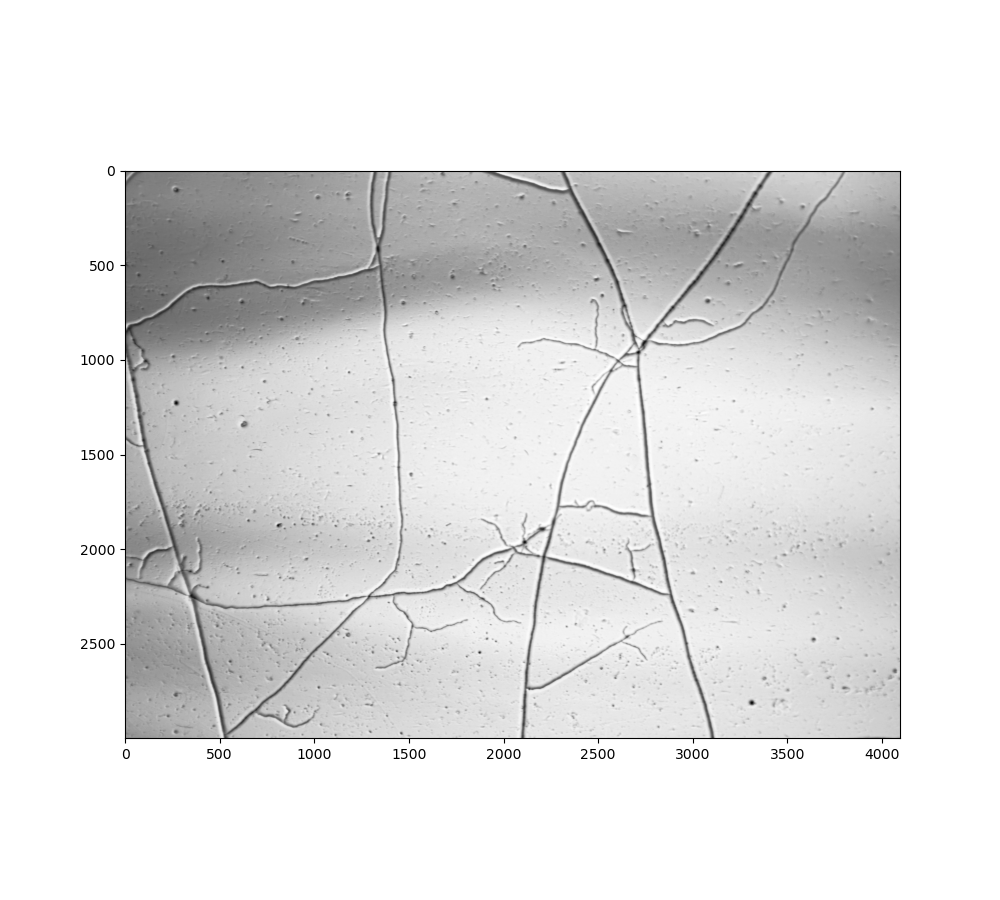

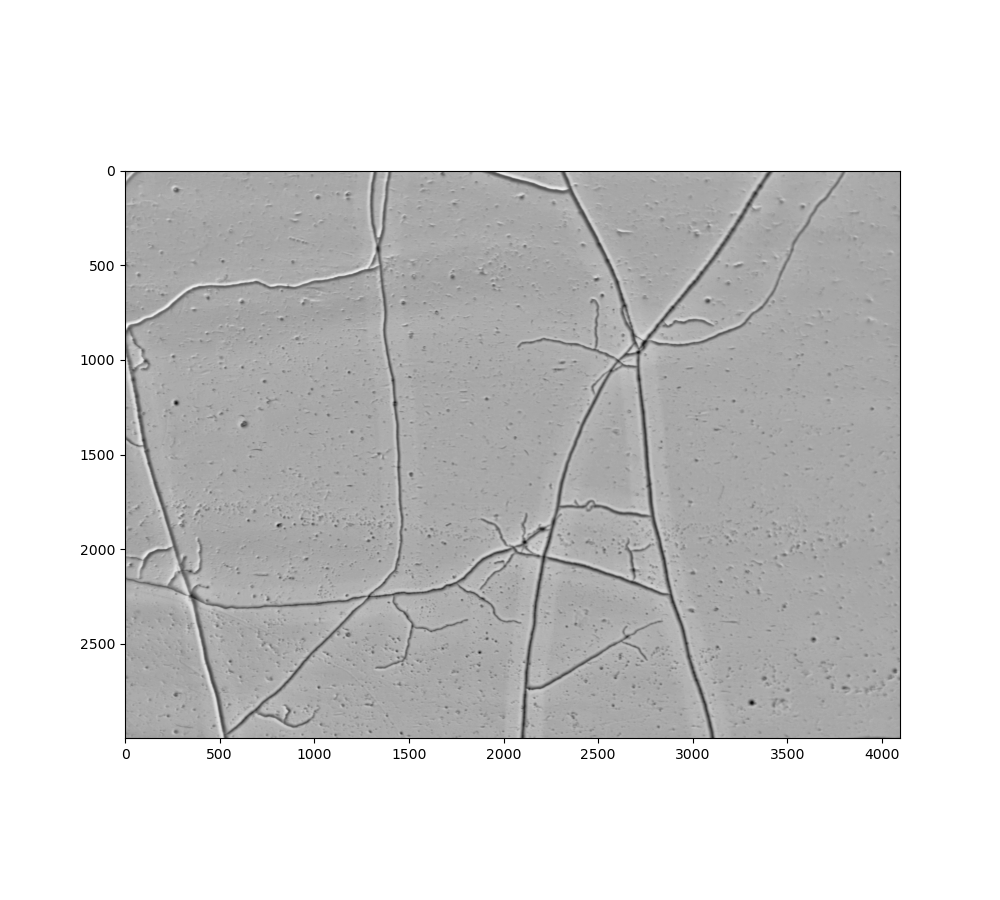

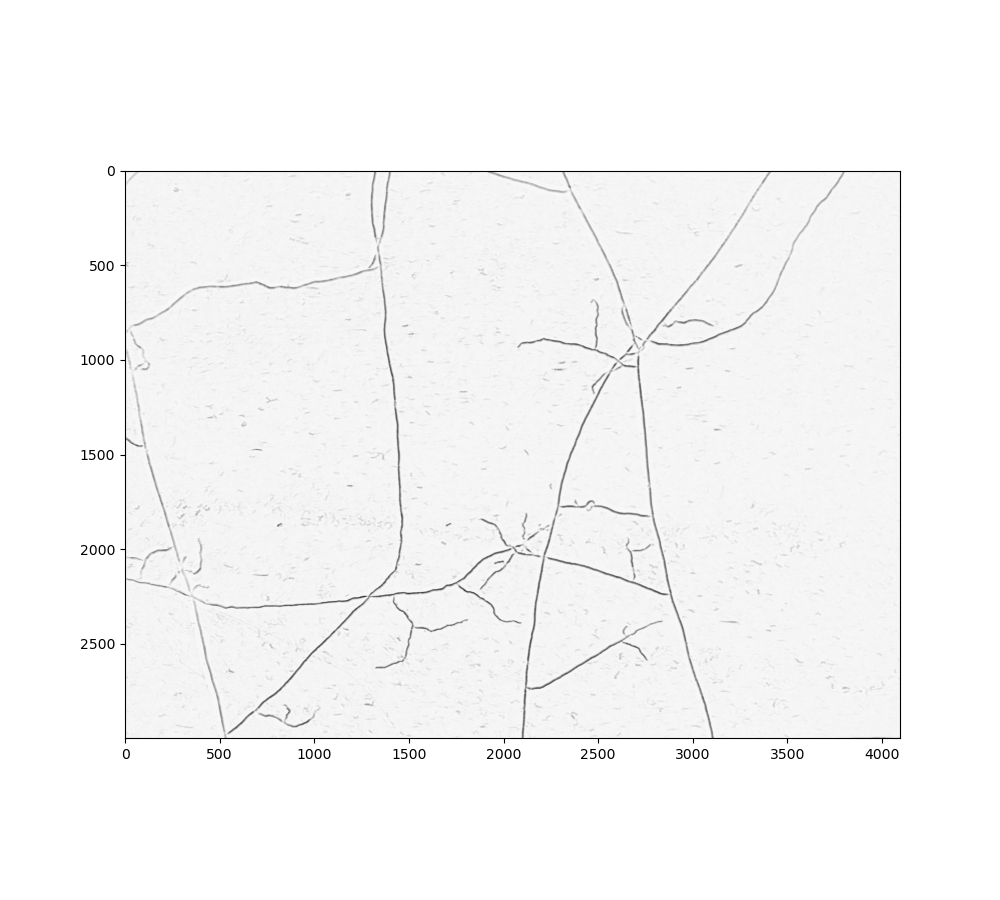

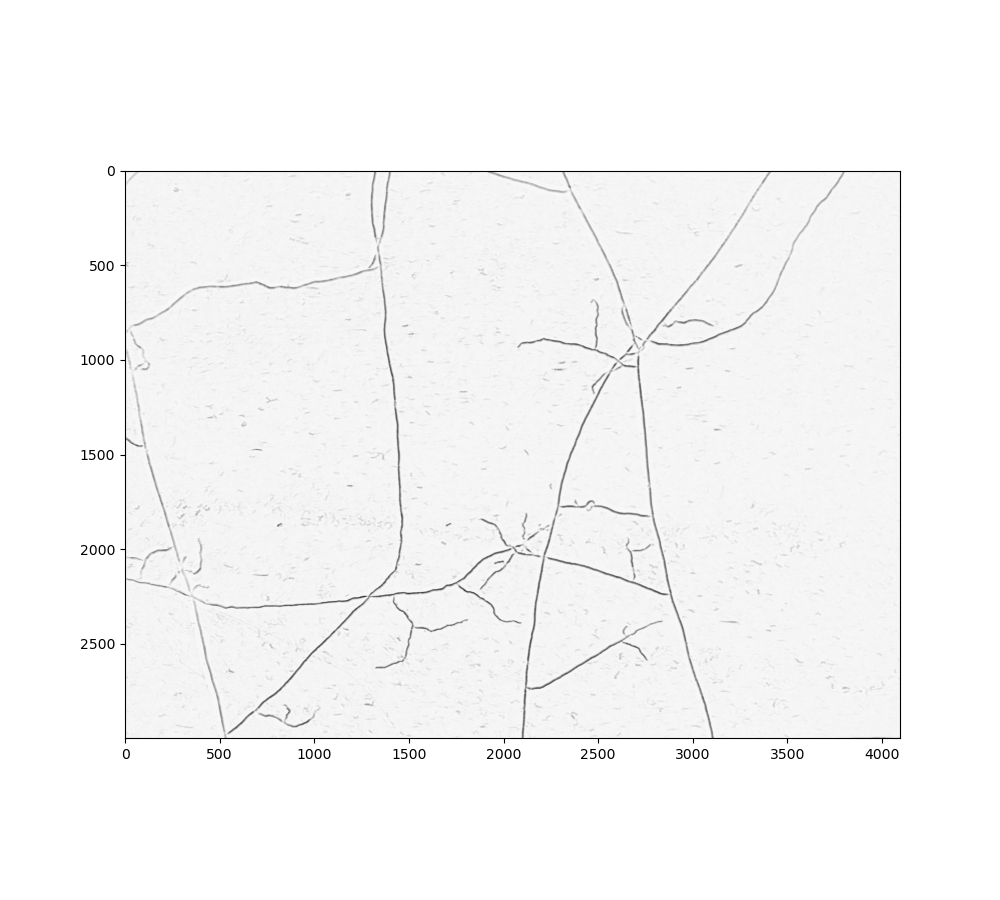

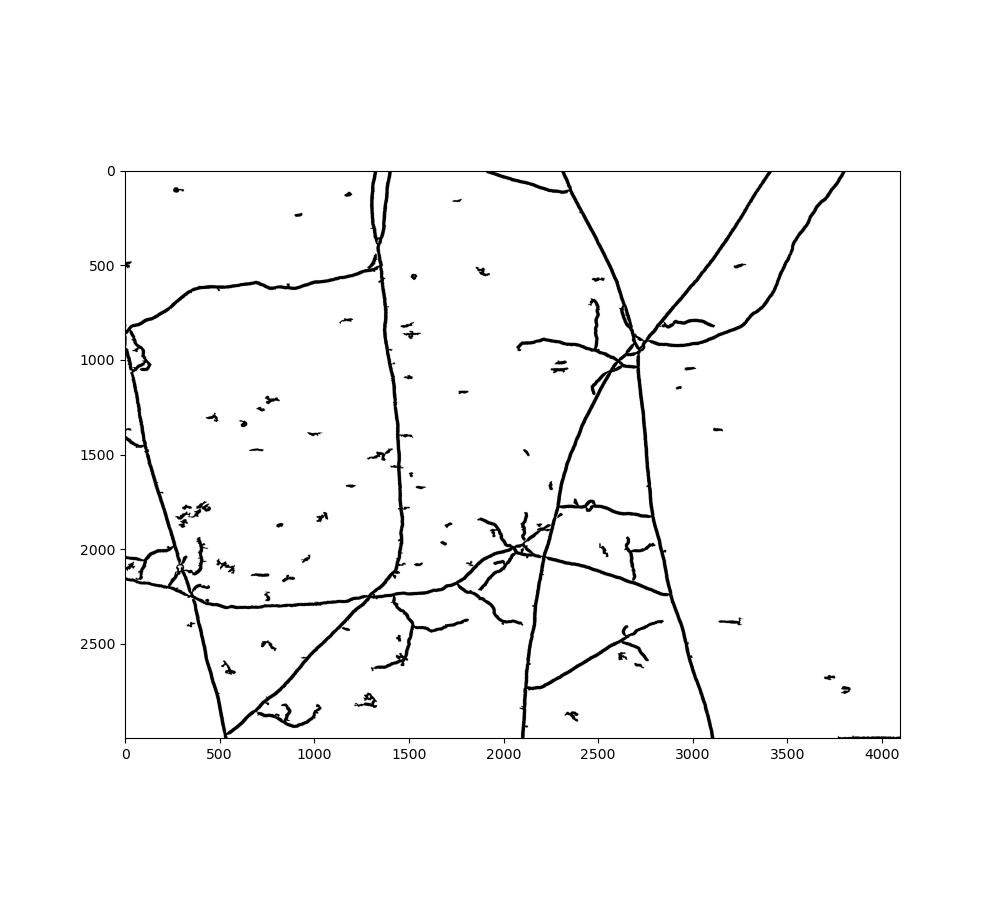

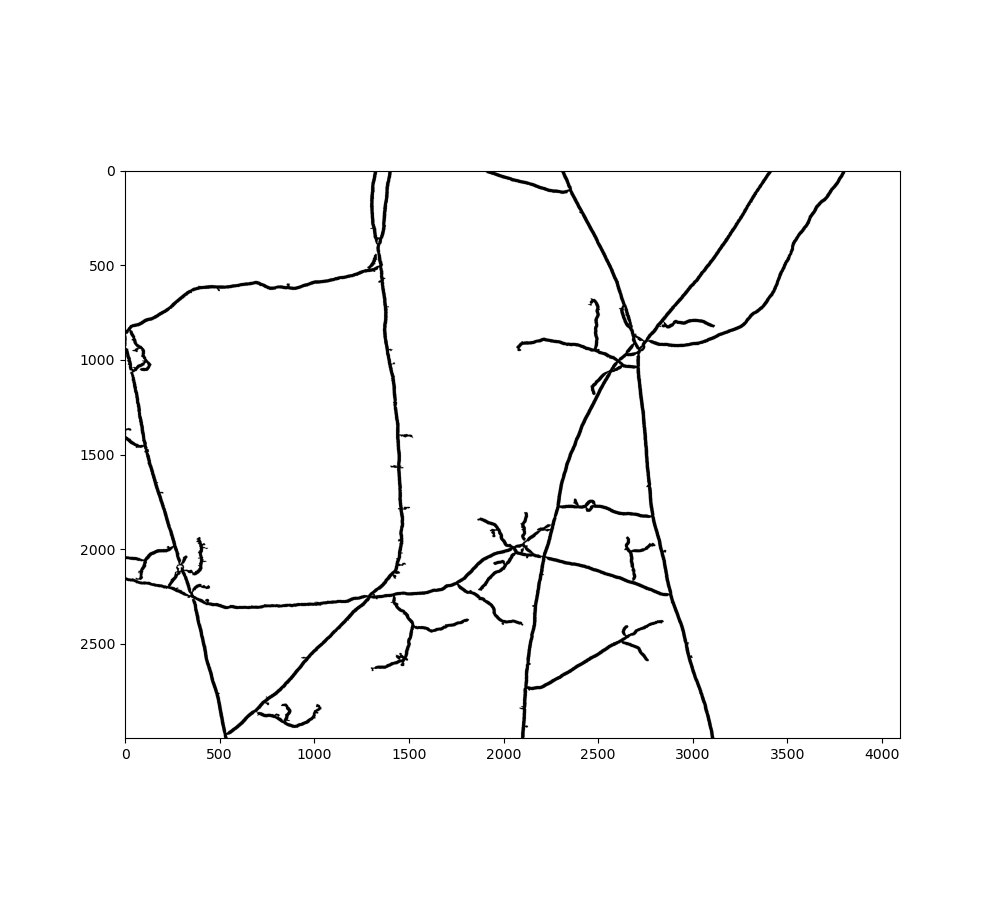

In [28]:
import cv2 as cv
from amftrack.pipeline.functions.node_id import (remove_spurs)
from amftrack.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc, generate_skeleton

no = 15
si = [20]
low = 30
high = 100
from amftrack.pipeline.functions.extract_skel import bowler_hat
for index,im in enumerate(ims):
    boundaries = int(tileconfig[2][index][0]-np.min(xs)),int(tileconfig[2][index][1]-np.min(ys))
    if boundaries[1]<=linex< boundaries[1]+shape[0] and boundaries[0]<=liney< boundaries[0]+shape[1]:
        print(index)
        im_cropped = im
        im_blurred =cv2.blur(im_cropped, (200, 200))
        im_back_rem = (im_cropped)/((im_blurred==0)*np.ones(im_blurred.shape)+im_blurred)*120
        bowled_hat = bowler_hat(-im_back_rem, no, si)
        transformed = 255*(bowled_hat)
        hyst = filters.apply_hysteresis_threshold(transformed, low, high)
        kernel = np.ones((3, 3), np.uint8)
        dilation = cv.dilate(hyst.astype(np.uint8) * 255, kernel, iterations=1)
        for i in range(3):
            dilation = cv.erode(dilation.astype(np.uint8) * 255, kernel, iterations=1)
            dilation = cv.dilate(dilation.astype(np.uint8) * 255, kernel, iterations=1)
        dilated = dilation > 0

        nb_components, output, stats, centroids = cv.connectedComponentsWithStats(dilated.astype(np.uint8), connectivity=8)
        # connectedComponentswithStats yields every seperated component with information on each of them, such as size
        # the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
        sizes = stats[1:, -1];
        nb_components = nb_components - 1

        # minimum size of particles we want to keep (number of pixels)
        # here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
        min_size = 4000

        # your answer image
        img2 = np.zeros((dilated.shape))
        # for every component in the image, you keep it only if it's above min_size
        for i in range(0, nb_components):
            if sizes[i] >= min_size:
                img2[output == i + 1] = 1
        skeletonized = cv.ximgproc.thinning(np.array(255*img2,dtype=np.uint8))
        nx_g = generate_nx_graph(from_sparse_to_graph(scipy.sparse.dok_matrix(skeletonized)))
        g,pos= nx_g
        nx_graph, pos = remove_spurs(g, pos)
        skel = generate_skeleton(nx_graph,dim=(3000, 4096)).todense()
#         skeletonized = cv.ximgproc.thinning(np.array(255*img2,dtype=np.uint8))
#         nx_g = generate_nx_graph(from_sparse_to_graph(scipy.sparse.dok_matrix(skeletonized)))
#         g,pos= nx_g
#         tips = [node for node in g.nodes if g.degree(node)==1]
#         dilated_bis = np.copy(img2)
#         for tip in tips:
#             branch = np.array(orient(g.get_edge_data(*list(g.edges(tip))[0])['pixel_list'],pos[tip]))
#             orientation = branch[0]-branch[min(branch.shape[0]-1,20)]
#             orientation = orientation/(np.linalg.norm(orientation))
#             window = 20
#             x,y = pos[tip][0],pos[tip][1]
#             if x-window>=0 and x+window< dilated.shape[0] and y-window>=0 and y+window< dilated.shape[1]:
#                 shape_tip = dilated[x-window:x+window,y-window:y+window]
#     #             dist = 20
#                 for i in range(dist):
#                     pixel = (pos[tip]+orientation*i).astype(int)
#                     xp,yp = pixel[0],pixel[1]
#                     if xp-window>=0 and xp+window< dilated.shape[0] and yp-window>=0 and yp+window< dilated.shape[1]:
#                         dilated_bis[xp-window:xp+window,yp-window:yp+window]+=shape_tip
#         dilation = cv.dilate(dilated_bis.astype(np.uint8) * 255,kernel,iterations = 1)
#         for i in range(3):
#             dilation=cv.erode(dilation.astype(np.uint8) * 255,kernel,iterations = 1)
#             dilation = cv.dilate(dilation.astype(np.uint8) * 255,kernel,iterations = 1)
#         skeletonized = cv2.ximgproc.thinning(np.array(255*(dilation>0),dtype=np.uint8))
        print('Raw image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(-im,cmap = 'Greys')
        print('Raw image with background removed')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(-im_back_rem,cmap = 'Greys')
        print('bowled image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(bowled_hat,cmap = 'Greys')
        print('final transformed image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(transformed,cmap = 'Greys')
        print('threhsolded image')
        fig=plt.figure(figsize=(10,9))
        ax = fig.add_subplot(111)
        ax.imshow(dilated>0,cmap = 'Greys')
        print('threhsolded image')
        fig=plt.figure(figsize=(10,9))
        
        ax = fig.add_subplot(111)
        ax.imshow(img2>0,cmap = 'Greys')
#         print('extended tips')
#         fig=plt.figure(figsize=(10,9))
#         ax = fig.add_subplot(111)
#         ax.imshow(dilated_bis>0,cmap = 'Greys')
#         print('final_skel')
# #         fig=plt.figure(figsize=(10,9))
# #         ax = fig.add_subplot(111)
# #         ax.imshow(cv2.normalize(abs(hessian), None, 0, 255, cv2.NORM_MINMAX)-255*dilated)
        plot_t_tp1([],[],None,None,skel,im_back_rem)

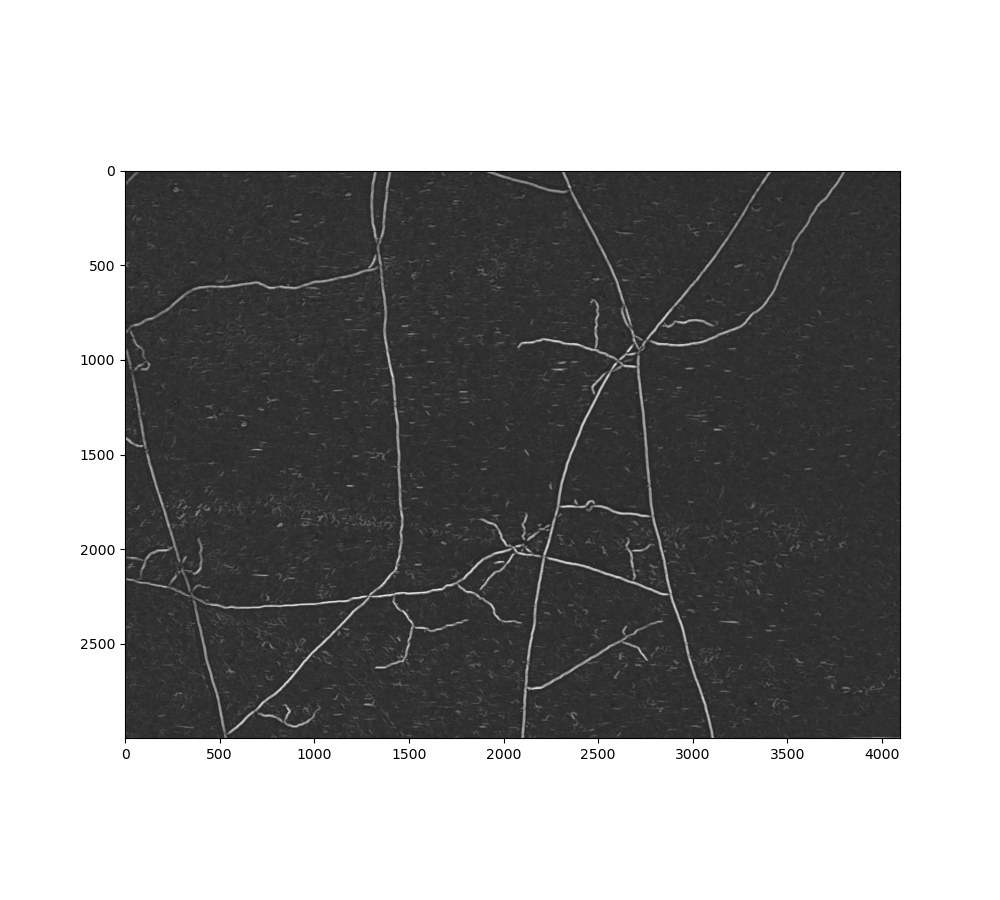

In [20]:
fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.imshow(transformed,cmap = 'Greys')

In [13]:
folders2 = folders.loc[folders['Plate'].isin([88,785,792])]

In [14]:
folders2

folder Plate PrincePos    root strain    medium split  \
1755  20211009_1815_Plate38   785        38  Carrot     A5  001P100N     Y   
1756  20210922_2313_Plate17    88        17  Carrot     A5  001P100N     Y   
1761  20211004_0900_Plate17    88        17  Carrot     A5  001P100N     Y   
1763  20210918_1729_Plate21   792        21  Carrot     A5  001P100N     Y   
1764  20210930_2029_Plate38   785        38  Carrot     A5  001P100N     Y   
...                     ...   ...       ...     ...    ...       ...   ...   
2685  20210921_0516_Plate17    88        17  Carrot     A5  001P100N     Y   
2686  20210917_1318_Plate21   792        21  Carrot     A5  001P100N     Y   
2688  20210916_2307_Plate17    88        17  Carrot     A5  001P100N     Y   
2690  20211008_0616_Plate38   785        38  Carrot     A5  001P100N     Y   
2691  20210917_0118_Plate21   792        21  Carrot     A5  001P100N     Y   

     Temp CrossDate /Img/TileConfiguration.txt.registered  ...  \
1755  NaN  20210928                                  True  ...   
1756  NaN  20210915                                  True  ...   
1761  NaN  20210915                                  True  ...   
1763  NaN  20210915                                  True  ...   
1764  NaN  20210928                                  True  ...   
...   ...       ...                                   ...  ...   
2685  NaN  20210915                                  True  ...   
2686  NaN  20210915                                  True  ...   
2688  NaN  20210915                                  True  ...   
2690  NaN  20210928                                  True  ...   
2691  NaN  20210915                                  True  ...   

     /Analysis/skeleton_masked_compressed.mat  \
1755                                     True   
1756                                     True   
1761                                     True   
1763                                     True   
1764                                     True   
...                                       ...   
2685                                     True   
2686                                     True   
2688                                     True   
2690                                     True   
2691                                     True   

     /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
1755                                    False                   False   
1756                                    False                   False   
1761                                    False                   False   
1763                                    False                   False   
1764                                    False                   False   
...                                       ...                     ...   
2685                                    False                   False   
2686                                    False                   False   
2688                                    False                   False   
2690                                    False                   False   
2691                                    False                   False   

     /Analysis/transform_corrupt.mat  \
1755                           False   
1756                           False   
1761                           False   
1763                           False   
1764                           False   
...                              ...   
2685                           False   
2686                           False   
2688                           False   
2690                           False   
2691                           False   

     /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
1755                                       False                       False   
1756                                       False                       False   
1761                                       False                       False   
1763                    

***Mask baits and border of the petri dish***

In [15]:
num_parallel = 25
time = '2:00'
thresh = 70
args=[thresh, directory]
run_parallel('mask_skel.py',args,folders2,num_parallel,time,'mask')

sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42481
Submitted batch job 42482


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42483
Submitted batch job 42484


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42485
Submitted batch job 42486


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42487
Submitted batch job 42488


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42489


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42490
Submitted batch job 42491
Submitted batch job 42492


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42493
Submitted batch job 42494
Submitted batch job 42495
Submitted batch job 42496


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


***Check Masking***

10


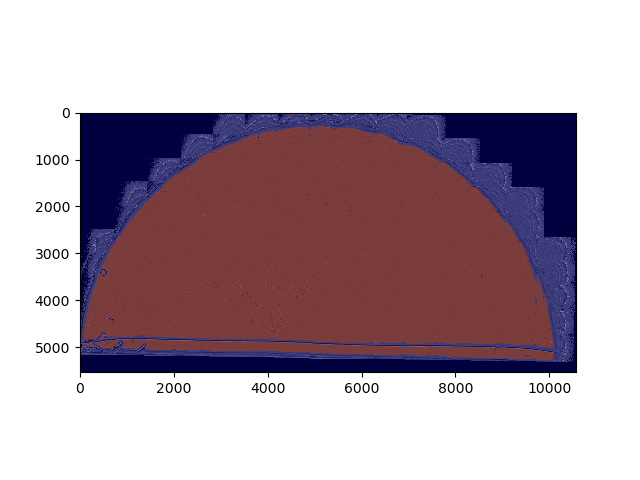

785


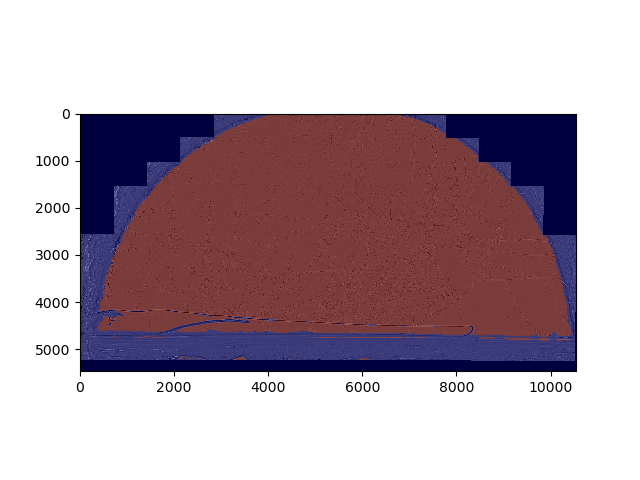

787


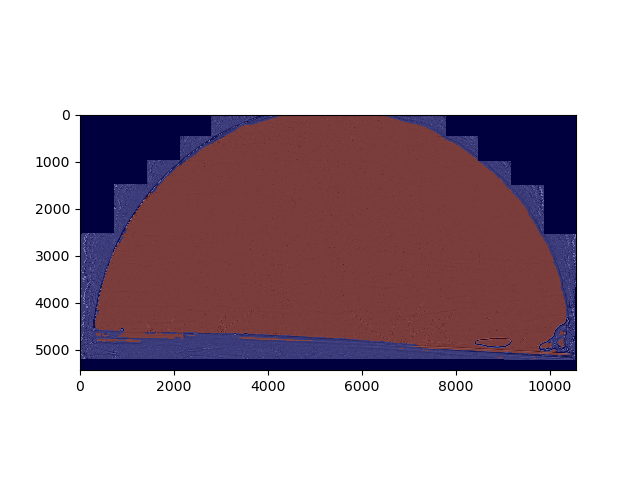

22


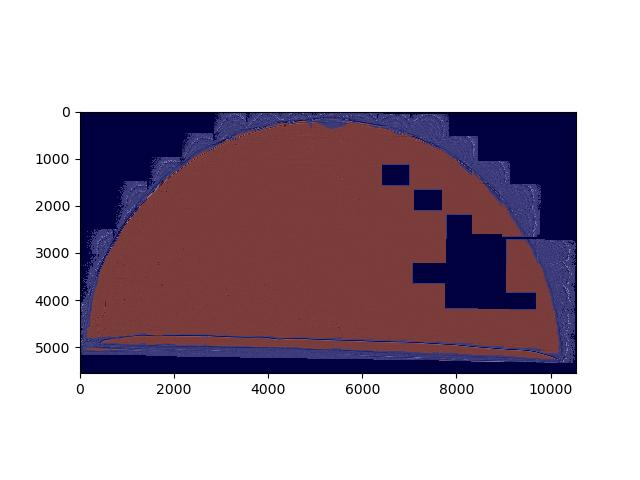

790


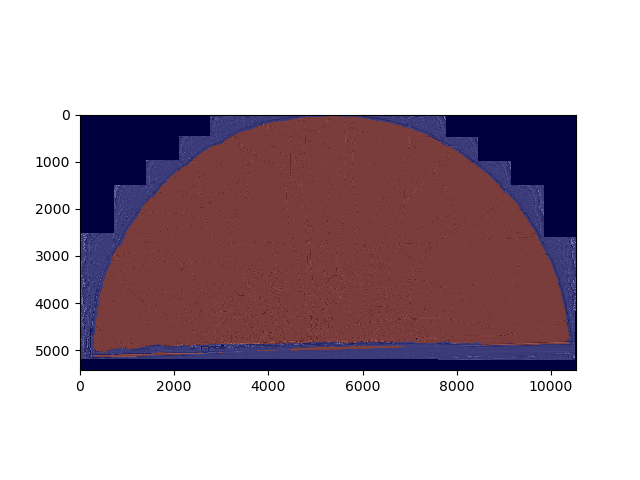

792


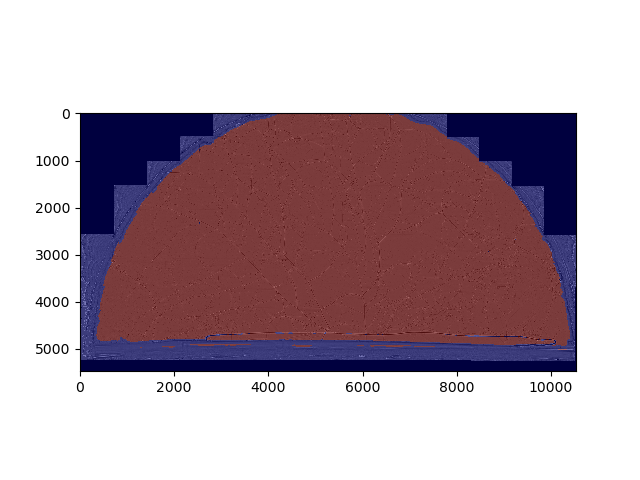

152


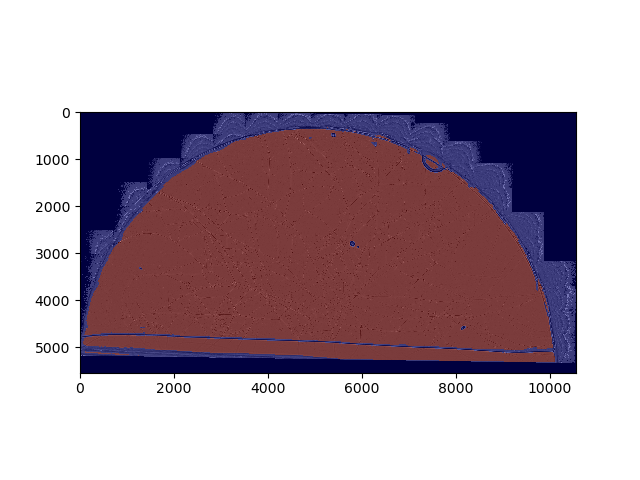

26


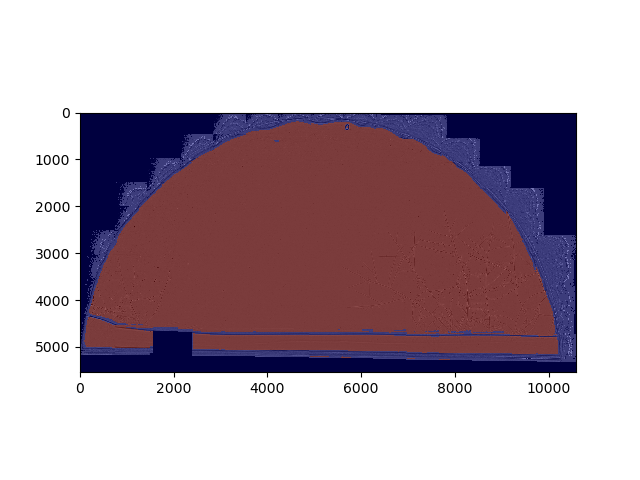

799


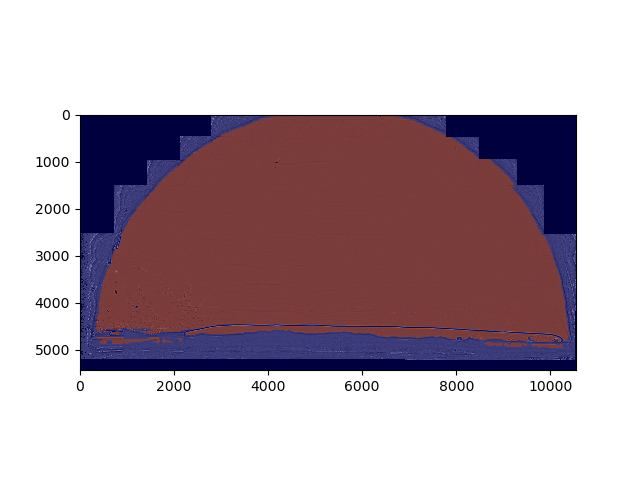

800


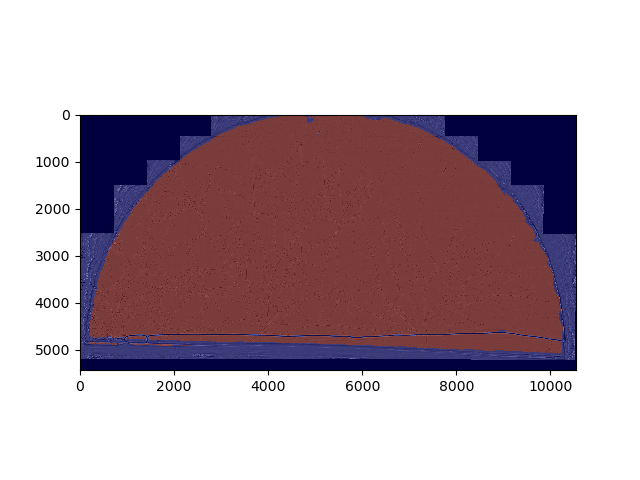

808


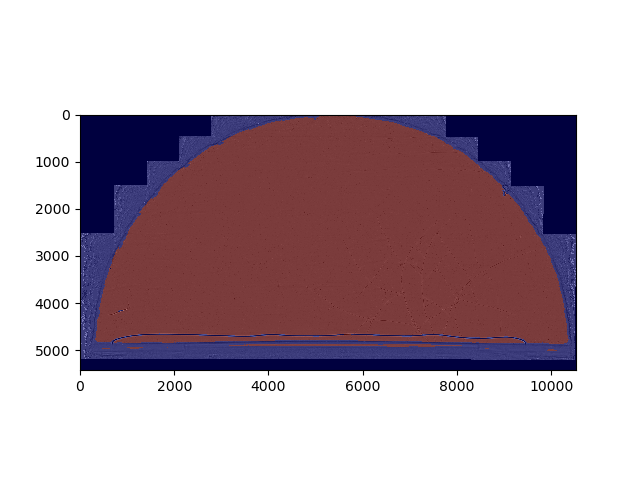

59


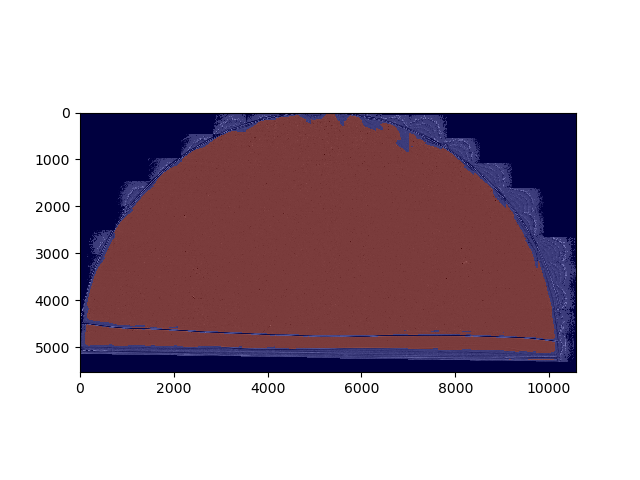

69


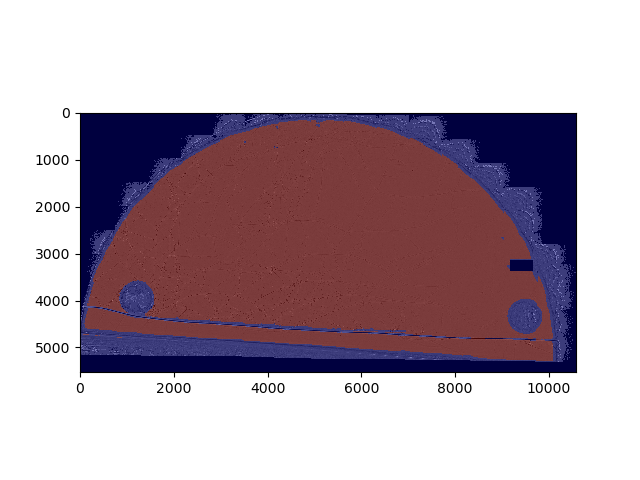

76


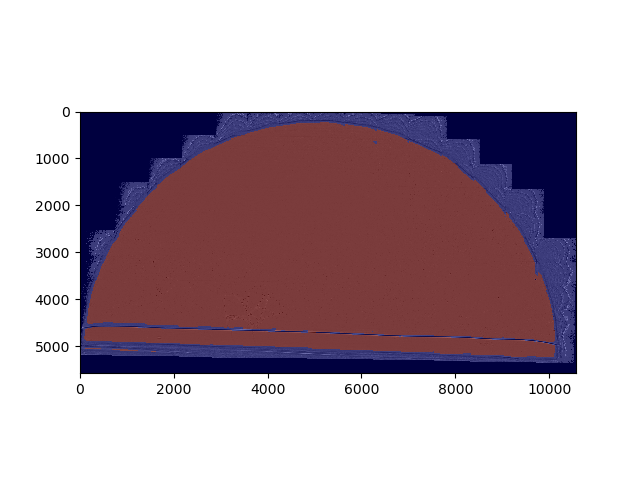

80


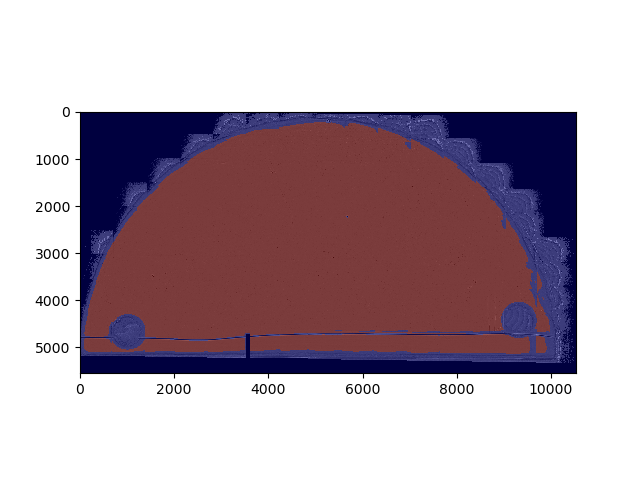

88


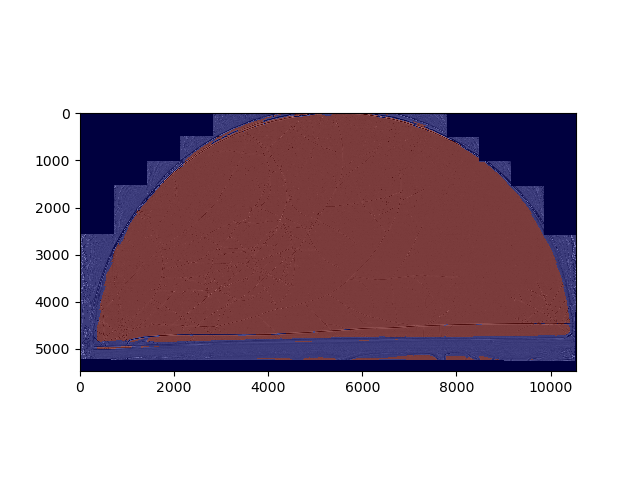

91


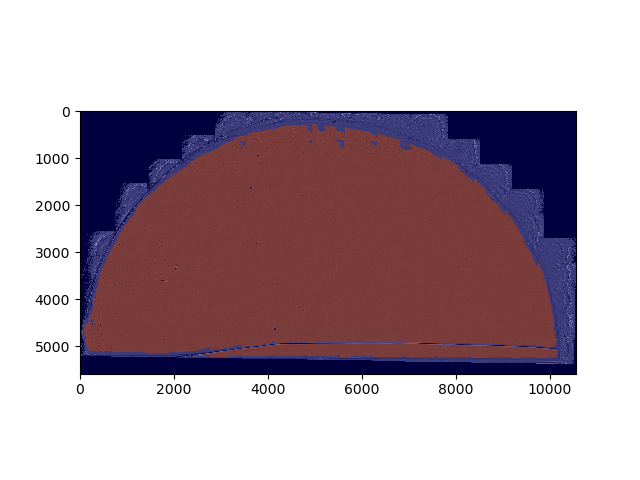

94


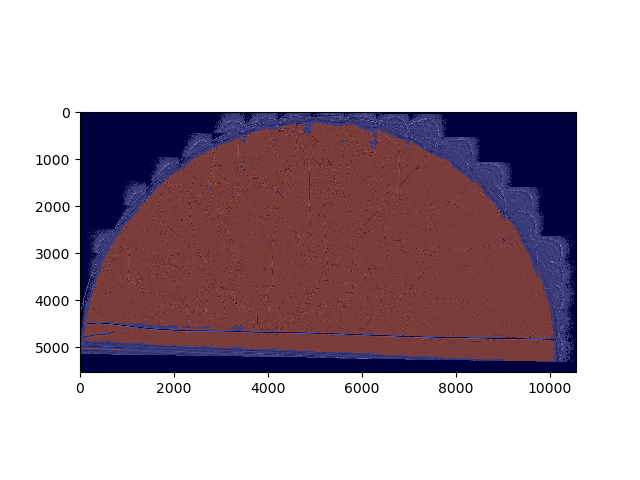

102


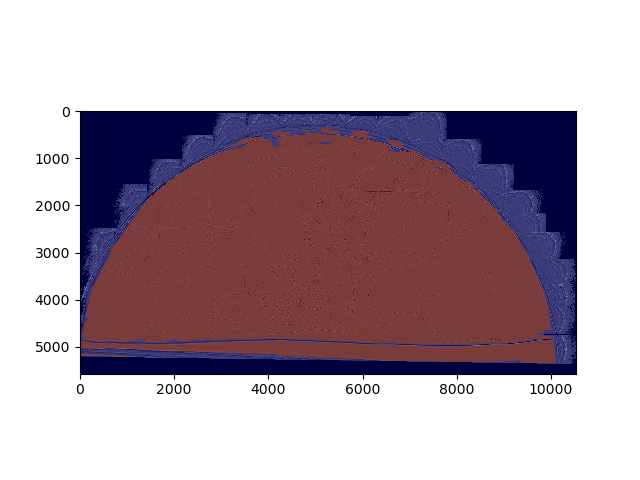

In [7]:
plates = list(set(list(folders['Plate'].values)))
for plate in plates:
    print(plate)
    select = folders.loc[folders['Plate']==plate]
    folder_list = list(select['folder'])
    folder_list.sort()
    skels = []
    ims = []
    masks= []
    kernel = np.ones((5,5),np.uint8)
    itera = 1
    start = choice(range(len(folder_list)))
    finish = start+2
    kernel = np.ones((5,5),np.uint8)
    for folder in folder_list[start:finish]:
        path_snap=directory+folder
        skel_info = read_mat(path_snap+'/Analysis/skeleton_masked_compressed.mat')
        skel = skel_info['skeleton']
        skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
        mask_info = read_mat(path_snap+'/Analysis/mask.mat')
        mask = mask_info['mask']
        masks.append(mask)
        im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
        ims.append(im)
    start = 0
    finish = start + 1
    for i in range(start,finish):
        plot_t_tp1([], [], None, None,masks[i], ims[i])

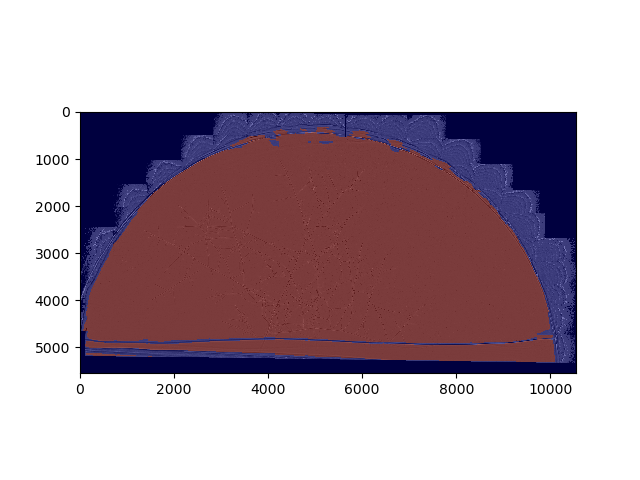

In [6]:
plt.close('all')
start = 0
finish = start + 1
for i in range(start,finish):
    plot_t_tp1([], [], None, None,masks[i], ims[i])

***Prune Graph***

In [8]:
num_parallel = 100
time = '50:00'
threshold = 0.1
args = [threshold, directory]
run_parallel('prune_skel.py',args,folders,num_parallel,time,'prune_graph')

Submitted batch job 42726
Submitted batch job 42727
Submitted batch job 42728


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42729
Submitted batch job 42730
Submitted batch job 42731
Submitted batch job 42732
Submitted batch job 42733
Submitted batch job 42734


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42735
Submitted batch job 42736


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42737
Submitted batch job 42738
Submitted batch job 42739


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 42740
Submitted batch job 42741
Submitted batch job 42742
Submitted batch job 42743


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


***Check Pruned Graphs***

In [137]:
select = folders
folder_list = list(select['folder'])
folder_list.sort()
skels = []
ims = []
masks= []
kernel = np.ones((5,5),np.uint8)
itera = 1
start = 15
finish = start+2
kernel = np.ones((5,5),np.uint8)
for folder in folder_list[start:finish]:
    path_snap=directory+folder
    skel_info = read_mat(path_snap+'/Analysis/skeleton_pruned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    ims.append(im)

In [65]:
plt.close('all')
kernel = np.ones((5,5),np.uint8)
for i in range(len(compressed)-1):
    plot_t_tp1([],[],None,None,cv2.dilate(compressed[i].astype(np.uint8),kernel,iterations = 2),cv2.dilate(compressed[i+1].astype(np.uint8),kernel,iterations = 2))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
plates = list(set(list(folders['Plate'].values)))
len(plates)

18

***Realign***

In [32]:
plates = list(set(list(folders['Plate'].values)))
for plate in plates:
    select = folders.loc[folders['Plate']==plate]
    num_parallel =80
    time = '3:00:00'
    thresh = 10000
    args=[thresh, directory]
    run_parallel('final_alignment.py',args,select,num_parallel,time,'realign')

sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 44206
Submitted batch job 44207
Submitted batch job 44208
Submitted batch job 44209


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 44210
Submitted batch job 44211
Submitted batch job 44212
Submitted batch job 44213
Submitted batch job 44214
Submitted batch job 44215
Submitted batch job 44216
Submitted batch job 44217


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 44218
Submitted batch job 44219
Submitted batch job 44220
Submitted batch job 44221
Submitted batch job 44222
Submitted batch job 44223


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


***Check Alignment***

In [18]:
plt.close('all')
start = 18
finish = start +2
dates_datetime = get_dates_datetime(directory,plate)
dates_datetime_chosen=dates_datetime[start:finish+1]
dates = dates_datetime_chosen
dilateds=[]
skels = []
skel_docs = []
Rs=[]
ts=[]
for date in dates[1:]:
    directory_name = get_dirname(date,plate)
    path_snap=directory+directory_name
    skel_info = read_mat(path_snap+'/Analysis/skeleton.mat')
    skel = skel_info['skeleton']
    skels.append(skel)
    skel_doc = sparse_to_doc(skel)
    skel_docs.append(skel_doc)
    transform = sio.loadmat(path_snap+'/Analysis/transform.mat')
    R,t = transform['R'],transform['t']
    Rs.append(R)
    ts.append(t)
# start = 0
# for j in range(start,start + 5):
#     print(dates[j],j+begin)
#     skeleton1,skeleton2 = skel_docs[j],skel_docs[j+1]
#     R,t = Rs[j],ts[j]
#     skelet_pos = np.array(list(skeleton1.keys()))
#     samples = np.random.choice(skelet_pos.shape[0],20000)
#     X = np.transpose(skelet_pos[samples,:])
#     skelet_pos = np.array(list(skeleton2.keys()))
#     samples = np.random.choice(skelet_pos.shape[0],20000)
#     Y = np.transpose(skelet_pos[samples,:])
#     fig=plt.figure(figsize=(10,9))
#     ax = fig.add_subplot(111)
#     Yrep=np.transpose(np.transpose(np.dot(R,X))+t)
#     ax.scatter(np.transpose(Yrep)[:,0],np.transpose(Yrep)[:,1])
#     ax.scatter(np.transpose(Y)[:,0],np.transpose(Y)[:,1])

***Create realigned Skeleton***

In [30]:
plates = list(set(list(folders['Plate'].values)))
for plate in plates:
    select = folders.loc[folders['Plate']==plate]
    num_parallel = 60
    time = '1:00:00'
    args = [directory]
    run_parallel('realign.py', args, select, num_parallel, time, 'create_realign')

sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 46880
Submitted batch job 46881
Submitted batch job 46882
Submitted batch job 46883
Submitted batch job 46884
Submitted batch job 46885
Submitted batch job 46886
Submitted batch job 46887


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 46888


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 46889
Submitted batch job 46890
Submitted batch job 46891
Submitted batch job 46892


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 46893
Submitted batch job 46894
Submitted batch job 46895
Submitted batch job 46896


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 46897
Submitted batch job 46898
Submitted batch job 46899
Submitted batch job 46900
Submitted batch job 46901
Submitted batch job 46902
Submitted batch job 46903
Submitted batch job 46904


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 46905
Submitted batch job 46906
Submitted batch job 46907
Submitted batch job 46908


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 46909
Submitted batch job 46910
Submitted batch job 46911
Submitted batch job 46912
Submitted batch job 46913
Submitted batch job 46914
Submitted batch job 46915
Submitted batch job 46916


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


***Check Fine Alignment***

In [5]:
start = begin+30
finish = start +2
dates_datetime = get_dates_datetime(directory,plate)
dates_datetime_chosen=dates_datetime[start:finish+1]
dates = dates_datetime_chosen
skels = []
ims = []
kernel = np.ones((5, 5), np.uint8)
itera = 1
for date in dates:
    directory_name = get_dirname(date,plate)
    path_snap = directory + directory_name
    skel_info = read_mat(path_snap+'/Analysis/skeleton_realigned_compressed.mat')
    skel = skel_info['skeleton']
#     skels.append(skel)
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    ims.append(im)


In [8]:
plt.close('all')
start = 0
finish = start + 1
for i in range(start, finish):
    plot_t_tp1([],[],None,None,skels[i],skels[i+1])

/home/cbisot/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.close('all')
directory = "/scratch/shared/mrozemul/Fiji.app/" 
listdir=os.listdir(directory) 
list_dir_interest=[name for name in listdir if name.split('_')[-1]==f'Plate{0 if plate<10 else ""}{plate}']
ss=[name.split('_')[0] for name in list_dir_interest]
ff=[name.split('_')[1] for name in list_dir_interest]
dates_datetime=[datetime(year=int(ss[i][:4]),month=int(ss[i][4:6]),day=int(ss[i][6:8]),hour=int(ff[i][0:2]),minute=int(ff[i][2:4])) for i in range(len(list_dir_interest))]
dates_datetime.sort()
begin = 0
end = 20
dates_datetime_chosen=dates_datetime[begin:end]
dates = [f'{0 if date.month<10 else ""}{date.month}{0 if date.day<10 else ""}{date.day}_{0 if date.hour<10 else ""}{date.hour}{0 if date.minute<10 else ""}{date.minute}' for date in dates_datetime_chosen]
zone = (13000,13000+5000+3000,20000,20000+5000+4096)
skels_aligned = []
for i,date in enumerate(dates):
    directory_name=f'2020{dates[i]}_Plate{0 if plate<10 else ""}{plate}'
    path_snap='/scratch/shared/mrozemul/Fiji.app/'+directory_name
    skels_aligned.append(sio.loadmat(path_snap+'/Analysis/skeleton_realigned.mat')['skeleton'])
for i in range(11,13):
    plot_t_tp1([],[],None,None,skels_aligned[i][zone[0]:zone[1],zone[2]:zone[3]].todense(),skels_aligned[i+1][zone[0]:zone[1],zone[2]:zone[3]].todense())

In [20]:
plt.close('all')
zone = (6000,13000,12000,22000)
fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.imshow(skels_aligned[11][zone[0]:zone[1],zone[2]:zone[3]].todense())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

***Create graphs***

In [6]:
num_parallel = 5
time = '30:00'
args=[plate, directory]
run_parallel('extract_nx_graph.py',args,begin,end,num_parallel,time,'extract_nx')

***Extract Width***

In [8]:
num_parallel = 16
time = '1:00:00'
args = [plate,directory]
run_parallel('extract_width.py',args,begin,end,num_parallel,time,'extract_width')

***Identify Nodes***

In [7]:
num_parallel = 1
time = '12:00:00'
args=[plate,begin,end, directory]
run_parallel('extract_nodes.py',args,0,0,num_parallel,time,'node_id')

***Check Node Id***

In [20]:
dates_datetime = get_dates_datetime(directory,plate)
dates_datetime_chosen = dates_datetime[begin:end+1]
dates = dates_datetime_chosen
exp = Experiment(plate)
exp.load(dates)

In [21]:
plt.close('all')
t = 2
nodes = np.random.choice(exp.nx_graph[t].nodes, 100)
# exp.plot([t,t+1,t+2],[list(nodes)]*3)
exp.plot([t,t+1,t+2],[nodes]*3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

***Hyphae extraction***

In [9]:
num_parallel = 1
time = '2:00:00'
args = [plate, begin, end, directory]
run_parallel('hyphae_extraction.py',args,0,0,num_parallel,time,'hyphae')

***Check Hyphae***

In [6]:
dates_datetime = get_dates_datetime(directory,plate)
dates_datetime_chosen=dates_datetime[begin:end+1]
dates = dates_datetime
exp = pickle.load( open(f'{directory}Analysis_Plate{plate}_{dates[0]}_{dates[-1]}/experiment_{plate}.pick', "rb" ) )

In [17]:
hyph = choice(exp.hyphaes)
hyph.ts

[14, 15, 16, 17]

In [18]:
plt.close('all')
hyph.end.show_source_image(hyph.ts[-1],hyph.ts[-1])

/home/cbisot/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
plt.close('all')
exp.plot([0,hyph.ts[-2],hyph.ts[-1]],[[hyph.root.label,hyph.end.label]]*3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …